In [32]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import os
from pathlib import Path

## Preprocessing the dataset

Images need to go to a df, then convert the RGB channels into pixels.

In [33]:
dataset_route = "../GroceryStoreDataset/dataset/"
train_txt_route = "../GroceryStoreDataset/dataset/train.txt"
val_txt_route = "../GroceryStoreDataset/dataset/val.txt"
test_txt_route = "../GroceryStoreDataset/dataset/test.txt"

In [34]:
def process_txt(route):
    df = pd.read_csv(route, sep=",",header=None,names=["route", "fine", "coarse", 'tensor'])
    return df

In [35]:
df = process_txt(train_txt_route)
df.head()

,route,fine,coarse,tensor
0,train/Fruit/Apple/Golden-Delicious/Golden-Deli...,0,0,NaN
1,train/Fruit/Apple/Golden-Delicious/Golden-Deli...,0,0,NaN
2,train/Fruit/Apple/Golden-Delicious/Golden-Deli...,0,0,NaN
3,train/Fruit/Apple/Golden-Delicious/Golden-Deli...,0,0,NaN
4,train/Fruit/Apple/Golden-Delicious/Golden-Deli...,0,0,NaN


In [36]:
df.shape

(2640, 4)

In [37]:
df_val = process_txt(val_txt_route)
df_val.head()

,route,fine,coarse,tensor
0,val/Fruit/Apple/Golden-Delicious/Golden-Delici...,0,0,NaN
1,val/Fruit/Apple/Golden-Delicious/Golden-Delici...,0,0,NaN
2,val/Fruit/Apple/Golden-Delicious/Golden-Delici...,0,0,NaN
3,val/Fruit/Apple/Golden-Delicious/Golden-Delici...,0,0,NaN
4,val/Fruit/Apple/Golden-Delicious/Golden-Delici...,0,0,NaN


In [38]:
df_test = process_txt(test_txt_route)
df_test.head()

,route,fine,coarse,tensor
0,test/Fruit/Apple/Golden-Delicious/Golden-Delic...,0,0,NaN
1,test/Fruit/Apple/Golden-Delicious/Golden-Delic...,0,0,NaN
2,test/Fruit/Apple/Golden-Delicious/Golden-Delic...,0,0,NaN
3,test/Fruit/Apple/Golden-Delicious/Golden-Delic...,0,0,NaN
4,test/Fruit/Apple/Golden-Delicious/Golden-Delic...,0,0,NaN


## From images to pixels

ResNet CNN uses a 224x224 pixels. Then, we must:

1. resize the images
2. convert them into a processable data for the cnn

In [39]:
def resize_image(route, size=(224,224)):
    img = tf.io.read_file(route)
    img = tf.image.decode_jpeg(img, channels=3)
    img_resized = tf.image.resize(img, [224, 224])
    img_normalised = img_resized / 255.0 # normalise data to improve performance and acc
    return img_normalised

In [40]:
df["tensor"] = df["route"].apply(lambda x: resize_image(os.path.join(dataset_route, x)))
df.head()

,route,fine,coarse,tensor
0,train/Fruit/Apple/Golden-Delicious/Golden-Deli...,0,0,"(((tf.Tensor(0.07058824, shape=(), dtype=float..."
1,train/Fruit/Apple/Golden-Delicious/Golden-Deli...,0,0,"(((tf.Tensor(0.5783479, shape=(), dtype=float3..."
2,train/Fruit/Apple/Golden-Delicious/Golden-Deli...,0,0,"(((tf.Tensor(0.34684873, shape=(), dtype=float..."
3,train/Fruit/Apple/Golden-Delicious/Golden-Deli...,0,0,"(((tf.Tensor(0.74612814, shape=(), dtype=float..."
4,train/Fruit/Apple/Golden-Delicious/Golden-Deli...,0,0,"(((tf.Tensor(0.394208, shape=(), dtype=float32..."


In [41]:
df_val["tensor"] = df_val["route"].apply(lambda x: resize_image(os.path.join(dataset_route, x)))
df_val.head()

,route,fine,coarse,tensor
0,val/Fruit/Apple/Golden-Delicious/Golden-Delici...,0,0,"(((tf.Tensor(0.44126683, shape=(), dtype=float..."
1,val/Fruit/Apple/Golden-Delicious/Golden-Delici...,0,0,"(((tf.Tensor(0.13513376, shape=(), dtype=float..."
2,val/Fruit/Apple/Golden-Delicious/Golden-Delici...,0,0,"(((tf.Tensor(0.15215617, shape=(), dtype=float..."
3,val/Fruit/Apple/Golden-Delicious/Golden-Delici...,0,0,"(((tf.Tensor(0.056168094, shape=(), dtype=floa..."
4,val/Fruit/Apple/Golden-Delicious/Golden-Delici...,0,0,"(((tf.Tensor(0.6362045, shape=(), dtype=float3..."


In [42]:
df_test["tensor"] = df_test["route"].apply(lambda x: resize_image(os.path.join(dataset_route, x)))
df_test.head()

,route,fine,coarse,tensor
0,test/Fruit/Apple/Golden-Delicious/Golden-Delic...,0,0,"(((tf.Tensor(0.5455182, shape=(), dtype=float3..."
1,test/Fruit/Apple/Golden-Delicious/Golden-Delic...,0,0,"(((tf.Tensor(0.5507003, shape=(), dtype=float3..."
2,test/Fruit/Apple/Golden-Delicious/Golden-Delic...,0,0,"(((tf.Tensor(0.2863658, shape=(), dtype=float3..."
3,test/Fruit/Apple/Golden-Delicious/Golden-Delic...,0,0,"(((tf.Tensor(0.42406806, shape=(), dtype=float..."
4,test/Fruit/Apple/Golden-Delicious/Golden-Delic...,0,0,"(((tf.Tensor(0.29791948, shape=(), dtype=float..."


## Research the data - it is balanced?

In [43]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_fine_distribution(df):
    if "fine" not in df.columns:
        raise ValueError("El DataFrame no contiene la columna 'fine'")
    
    value_counts = df["coarse"].value_counts()
    
    plt.figure(figsize=(14, 8))
    value_counts.plot(kind="bar", color="skyblue")
    plt.xlabel("Valores de 'coarse'")
    plt.ylabel("Frecuencia")
    plt.title("Distribución de la columna 'coarse'")
    plt.xticks(rotation=90, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

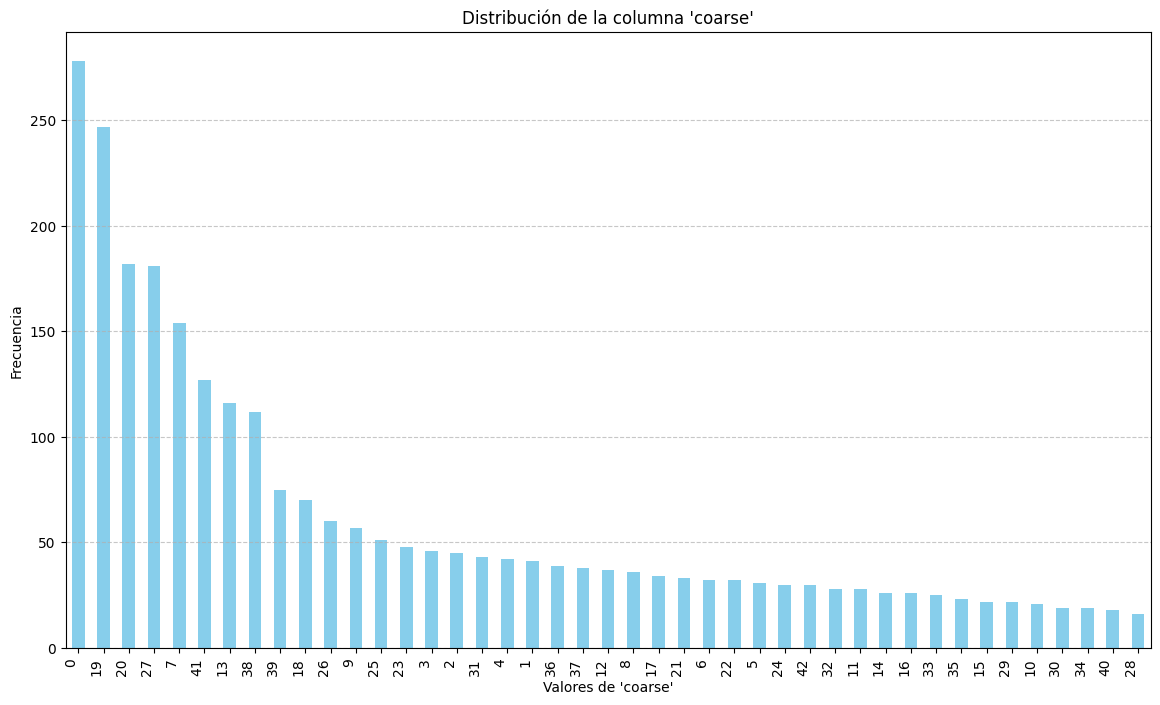

In [44]:
plot_fine_distribution(df)

No está balanceado ni mucho menos. Podemos borrar datos, o generar datos sintéticos. Optamos por la segunda opción.

In [60]:
class_counts = df['coarse'].value_counts()
valid_classes = class_counts[class_counts >= 50].index
filtered_df = df[df['coarse'].isin(valid_classes)]
print(filtered_df.shape)

(1710, 4)


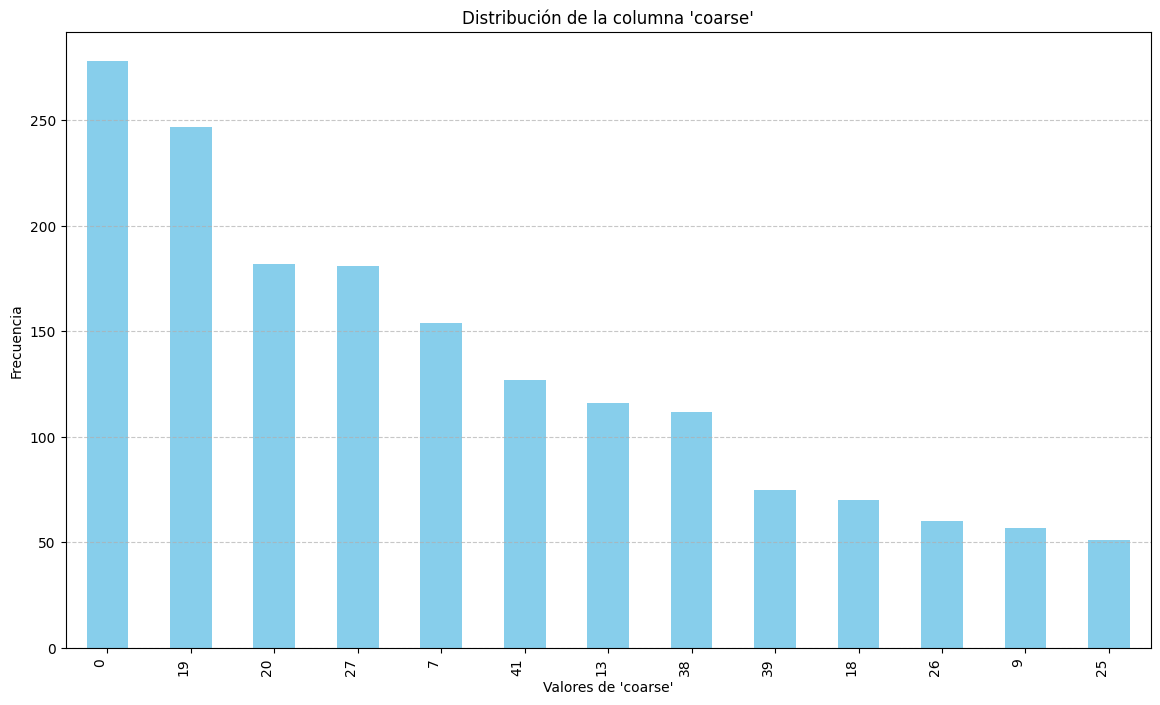

13
coarse
0     278
19    247
20    182
27    181
7     154
41    127
13    116
38    112
39     75
18     70
26     60
9      57
25     51
Name: count, dtype: int64


In [77]:
plot_fine_distribution(filtered_df)
print(len(filtered_df['coarse'].value_counts()))
print(filtered_df['coarse'].value_counts())

In [69]:
# Obtener las clases presentes en df (aquellas con más de 50 instancias)
valid_classes = class_counts[class_counts >= 50].index

# Filtrar df_val y df_test para que solo contengan las clases presentes en df
df_val_filtered = df_val[df_val['coarse'].isin(valid_classes)]
df_test_filtered = df_test[df_test['coarse'].isin(valid_classes)]

# Verificar el tamaño de los DataFrames filtrados
print(df_val_filtered.shape)
print(df_test_filtered.shape)
print(len(df_val_filtered['coarse'].value_counts()))
print(len(df_test_filtered['coarse'].value_counts()))

(175, 4)
(1601, 4)
12
13


## ResNet-34 - overfitted asf

No es útil porque hay demasiadas pocos datos. Y demasiadas capas. **El overfitting ocurre por cosas como estas**. Siempre, siempre, hay que buscar la cantidad de capas justa y necesaria (gasto y consumo computacional reducido aparte).

Mejor probamos con **MobileNetV2**.

[Link](https://www.analyticsvidhya.com/blog/2021/08/how-to-code-your-resnet-from-scratch-in-tensorflow/)

In [72]:
from tensorflow.keras.utils import to_categorical
import numpy as np

# Asegurándote de que las clases estén en el rango correcto (0 a 11)
y_train = np.array(filtered_df["coarse"].values)
y_val = np.array(df_val_filtered["coarse"].values)
y_test = np.array(df_test_filtered["coarse"].values)

# Asegúrate de que las etiquetas estén en el rango 0 a 11 (num_classes=12)
y_train = np.clip(y_train, 0, 12)
y_val = np.clip(y_val, 0, 12)
y_test = np.clip(y_test, 0, 12)

# Convertir las clases a formato one-hot (categórico)
y_train = to_categorical(y_train, num_classes=13)
y_val = to_categorical(y_val, num_classes=13)
y_test = to_categorical(y_test, num_classes=13)

# Preparar las características de entrada
X_train = np.stack(filtered_df["tensor"].values)
X_val = np.stack(df_val_filtered["tensor"].values)
X_test = np.stack(df_test_filtered["tensor"].values)

# Verifica la forma de las entradas
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)


(1710, 224, 224, 3)
(175, 224, 224, 3)
(1601, 224, 224, 3)


In [74]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

base_model = VGG16(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Congelar capas para evitar sobreajuste

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(13, activation='softmax')
])

model.compile(
    optimizer='adam',  # Optimizador recomendado
    loss='categorical_crossentropy',  # Para clasificación multiclase
    metrics=['accuracy']  # Para evaluar el rendimiento
)

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 13)                  │           6,669 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,566,925 (105.16 MB)

 Trainable params: 12,852,237 (49.03 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [75]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.6781 - loss: 2.5454 - val_accuracy: 0.8914 - val_loss: 0.3356
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.8751 - loss: 0.3528 - val_accuracy: 0.9029 - val_loss: 0.2609
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.9473 - loss: 0.1412 - val_accuracy: 0.9029 - val_loss: 0.2272
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.9505 - loss: 0.1238 - val_accuracy: 0.9029 - val_loss: 0.2306
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.9795 - loss: 0.0631 - val_accuracy: 0.9143 - val_loss: 0.2437
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.9813 - loss: 0.0520 - val_accuracy: 0.9314 - val_loss: 0.2083
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.9851 - loss: 0.0381 - val_accuracy: 0.9200 - val_loss: 0.2189
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.9792 - loss: 0.0543 - val_accuracy: 0.9314 - val_loss:

In [76]:
model.save('model.keras')  # Para Keras